# Bank Churn Analysis

## Libraries and importing dataset

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [28]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Read in the data
1.check the dimensions of dataset

2.fetching and attributes name and know what their meaning

3.generate info of the whole data

4.missing detection

5.duplicated detection

6.descriptive statisical analysis on categorical columns

In [29]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [30]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Here are some interpretion in some columns

CreditScore: It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.

geography: customer geography distribution

tenure: the number of years the customer has been associated with the bank

NumOfProducts:  It can include various offerings such as savings accounts, loans, credit cards, etc.

HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.

IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.

EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.

Exited: It indicates whether a customer has churned (1) or not (0) from the bank.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


10000 records in the dataset and non-null records.
10 numerical and 3 categorical

In [32]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


None missing value in this dataset

In [33]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


no duplicate records

In [34]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


I think Surename has not relationship with the customer churned or not. Unless their name has magic. So I will drop it.

## Data Wrangling
1.dropping insignificant columns
2.Rename some columns for better using 

In [35]:
df.drop(columns=["RowNumber","CustomerId", "Surname"],inplace=True)

In [44]:
df.rename(columns={"Exited":"Churned"},inplace=True)
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


## Explorative Data Analysis

### Visualize

#### Catogorical

1.Draw the distribution of customer churned

2.Customer Churned by Geography

3.Customer churned by Gender	

4.Customer churned by tenure

5.Customer churned by NumOfProducts

6.Customer churned by HasCrCard

7.Customer churned by IsActiveMember

#### Numerical

1.CreditScore

2.age

3.Balance

4.Estimated Salary


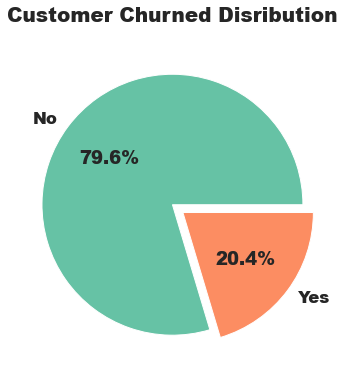

In [45]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

### Inference
Imbalance in class imbalanced
We can use the over-sampling technique from SMOTE

In [48]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

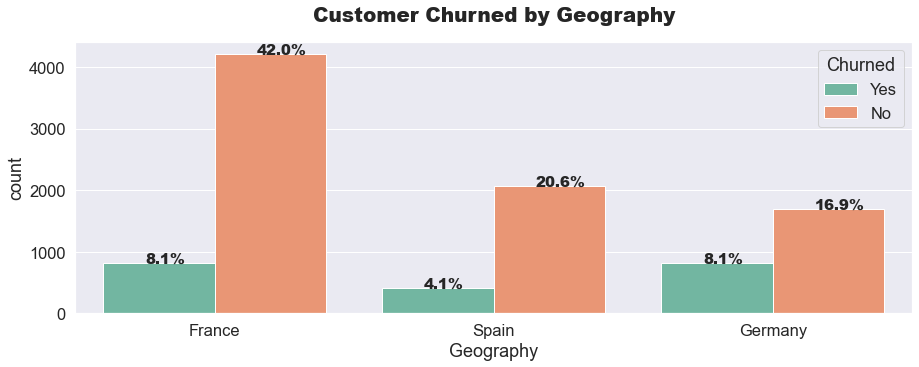

In [49]:
countplot('Geography')

50% of customer comes from France, Spain is the second, Germany is the least.

The ratio of churned and not churned in France is nearly 1:5, similar to that in Spain. However, in Germany is 1:2. 

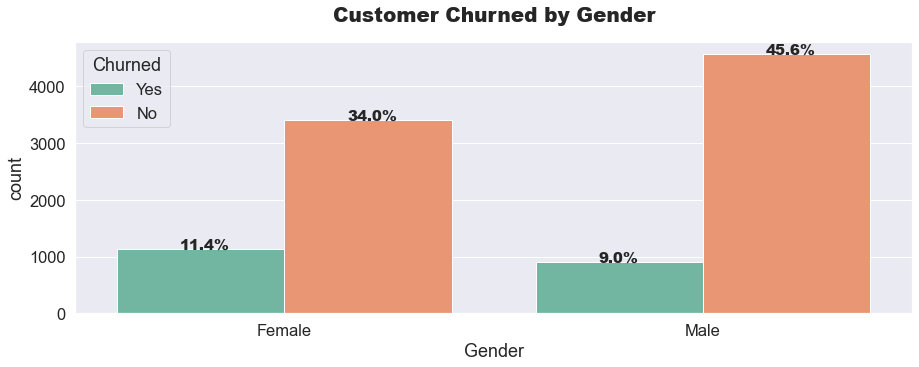

In [50]:
countplot("Gender")

Female customer is more likely to be churned.

Female customer is less than male for nearly 8%.

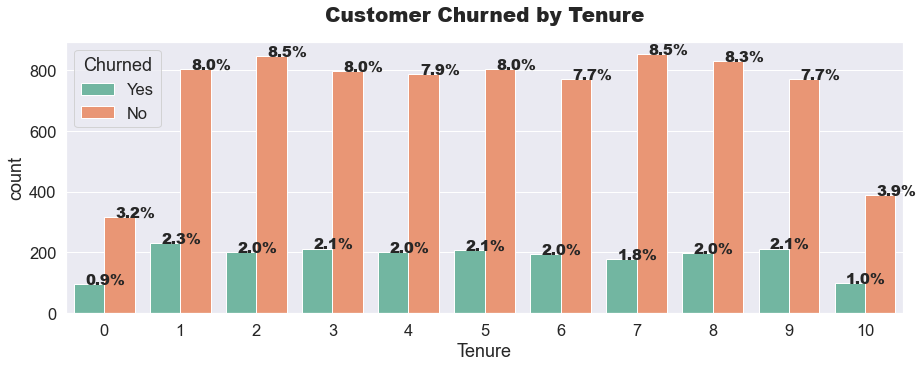

In [51]:
countplot("Tenure")

I think the distribution is similar except 10 or 0, so it is hard to make inference.

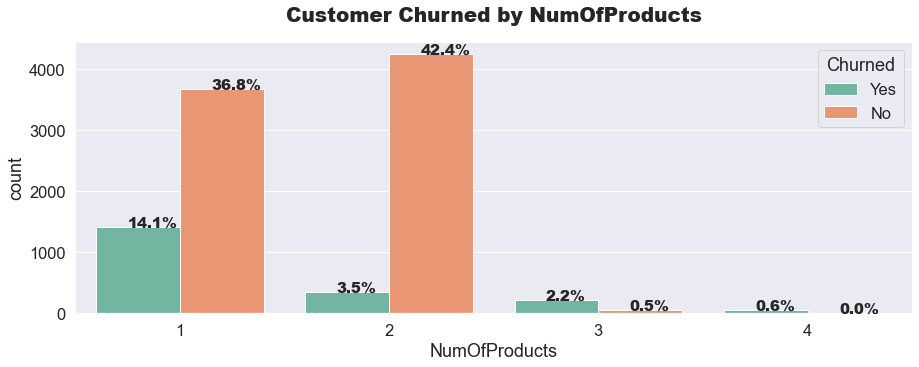

In [52]:
countplot("NumOfProducts")

1.Customer mostly buy 1 or 2 products of the bank

2.A very small churned rate in customers who buy 2 products compared to the not churned rate.

3.Very less people buy more than 2 products

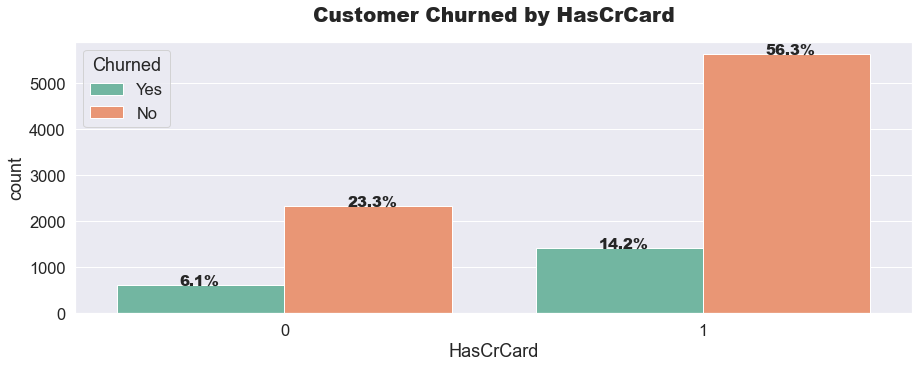

In [53]:
countplot("HasCrCard")

The ratio between them is 1:4 both.

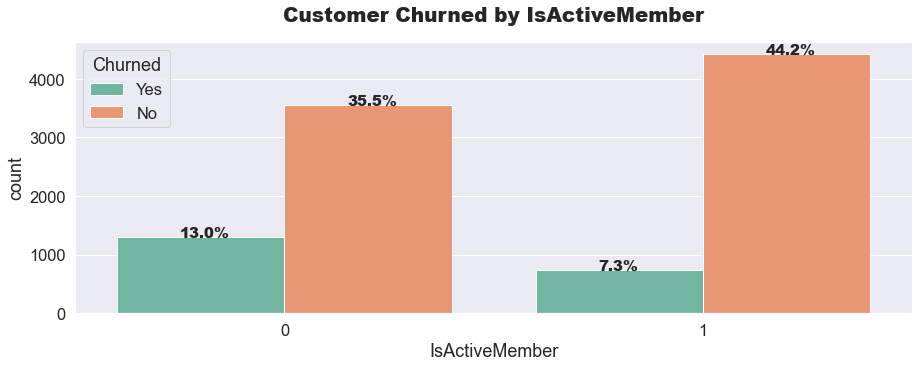

In [54]:
countplot("IsActiveMember")

Active member has a lower churned rate

In [77]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(data=df, x="Churned", y=df[column],palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

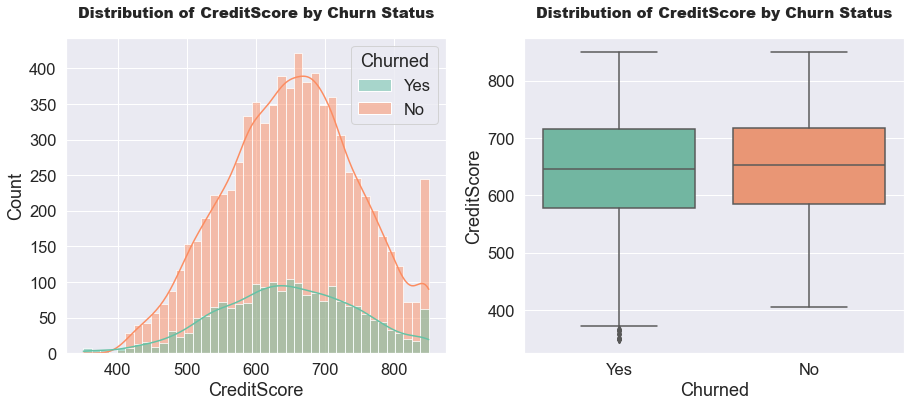

In [80]:
continous_plot("CreditScore")

They are similar in distribution and median

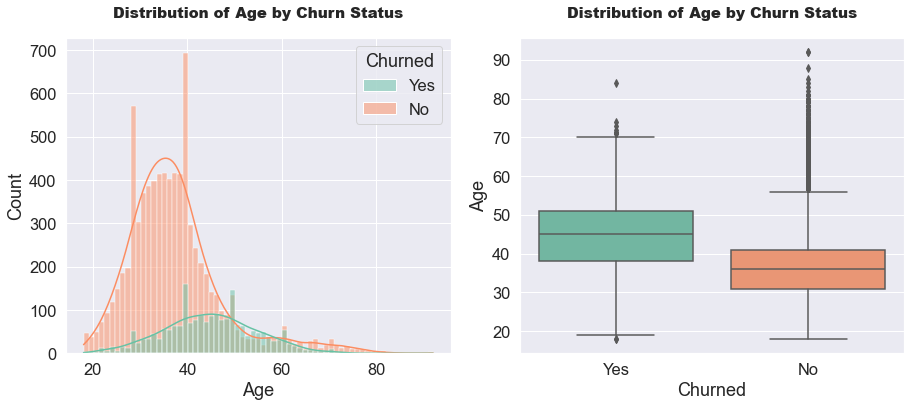

In [78]:
continous_plot("Age")

Among the the age groups over 50, there is a really high churned rate.

The distribution is right-skewed, we can apply log function on it to make it more normal

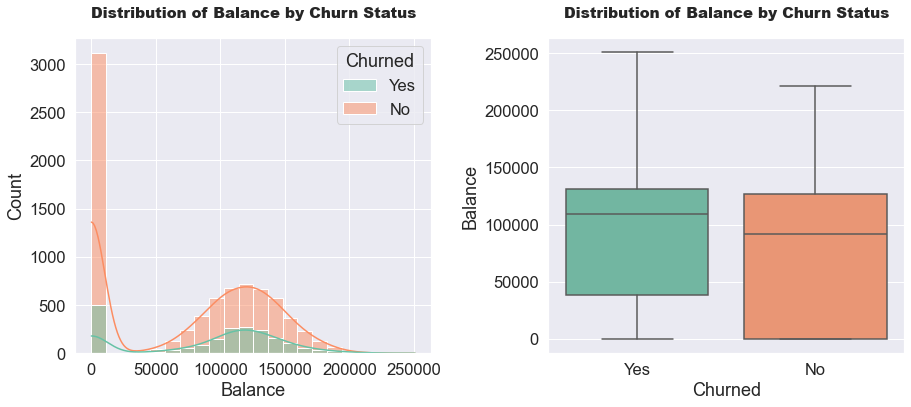

In [79]:
continous_plot("Balance")

More than 3000 people have balance, and it has a higher churned rate in the 0 balance account.

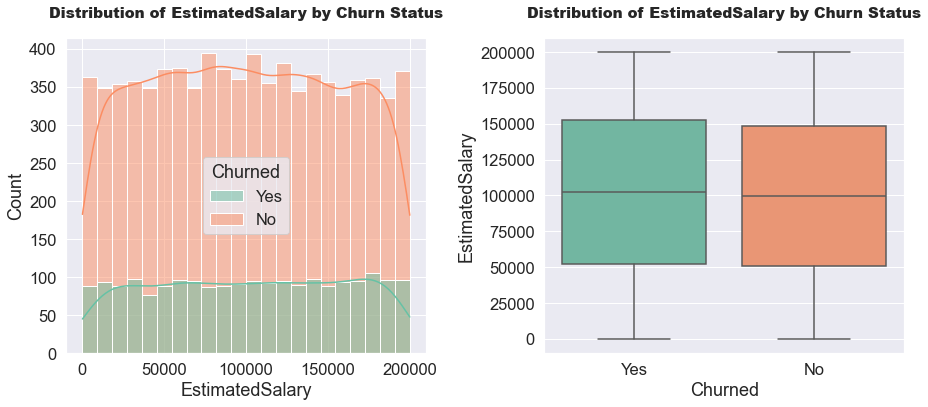

In [81]:
continous_plot("EstimatedSalary")

The distribution seems similar, so we can not make inference now.